## PART1 - Data Cleaning & Exploratory Data Analysis & Visualization


In [3]:
import warnings
warnings.filterwarnings('ignore')


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# %matplotlib inline
plt.style.use("ggplot")

import sklearn
from sklearn.decomposition import TruncatedSVD
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier

import random
from tqdm import tqdm
#from gensim.models import Word2Vec 

from IPython.display import display, HTML

%matplotlib inline

#### Loading the Dataset

In [5]:
def product_view_based_data():
  products = pd.read_csv("products.csv",index_col=[0])
  products.columns = ['Client','Timestamp','ProductId'] # renaming columns
    
  data = products.copy() ## to protect previous version

  return data

In [6]:
product_view_data = product_view_based_data()
product_view_data.head()

,Client,Timestamp,ProductId
208,85ab8f53-b934-49dd-8d54-479ed08499f6,2021-08-29 17:05:45.368000+00:00,63594
209,85ab8f53-b934-49dd-8d54-479ed08499f6,2021-08-29 17:07:02.711000+00:00,63290
210,85ab8f53-b934-49dd-8d54-479ed08499f6,2021-08-29 17:08:51.306000+00:00,64872
247,46989f50-87f9-4ece-9db3-cffaa3bf2278,2021-08-29 19:23:07.176000+00:00,63593
1665,dbbcd1c1-c0ca-4eed-b144-736fc40f6d24,2021-08-29 20:00:40.706000+00:00,56093


In [7]:
product_view_data.tail()

,Client,Timestamp,ProductId
17004826,8776db01-284d-435d-8a59-33cb75d8bf63,2021-09-14 16:17:36.304000+00:00,615292687
17004827,8776db01-284d-435d-8a59-33cb75d8bf63,2021-09-14 16:26:08.205000+00:00,113877068
17004886,5c48ff59-358d-4b7d-823d-21ce7b4b7d3b,2021-09-14 20:13:18.263000+00:00,745895506
17004950,e522131c-c63a-476e-b9c2-d2c9e25b3956,2021-09-14 10:15:28.010000+00:00,350993703
17005068,397f7431-3eba-4fff-acd3-818a64e5e26b,2021-09-14 10:19:12.904000+00:00,599284204


#### Structured Information of Dataset

In [8]:
print("Shape: %s" % str(product_view_data.shape))
print("Column names: %s" % str(product_view_data.columns))

Shape: (323614, 3)
Column names: Index(['Client', 'Timestamp', 'ProductId'], dtype='object')


In [9]:
product_view_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 323614 entries, 208 to 17005068
Data columns (total 3 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   Client     323614 non-null  object
 1   Timestamp  323614 non-null  object
 2   ProductId  323614 non-null  object
dtypes: object(3)
memory usage: 9.9+ MB


In [10]:
product_view_data.describe().T

,count,unique,top,freq
Client,323614,27799,83171363-2d52-4e96-be88-0e902ebf6055,15
Timestamp,323614,323573,2021-09-11 23:03:51.562000+00:00,2
ProductId,323614,83622,752126531,581


### Sort the dataframe by 'Timestamp' in Descending order


In [11]:
product_view_data_sorted = product_view_data.sort_values(by = 'Timestamp', ascending = False) 
product_view_data_sorted.head(10)

,Client,Timestamp,ProductId
12816843,c34f7696-1b94-4b90-85e3-55bddb0736ff,2021-09-19 20:59:51.447000+00:00,330910959
14039649,c34f7696-1b94-4b90-85e3-55bddb0736ff,2021-09-19 20:59:22.723000+00:00,a704117540
9490286,a46cd409-8c53-4434-99c4-cdb81b673219,2021-09-19 20:59:12.794000+00:00,88123936
16484288,aca66064-3e9d-4567-9346-538a4d835d89,2021-09-19 20:59:09.392000+00:00,a168531398
15589460,71258f55-c310-4825-ac0c-f60e4b68a8cc,2021-09-19 20:58:56.350000+00:00,a618220837
14039648,c34f7696-1b94-4b90-85e3-55bddb0736ff,2021-09-19 20:58:40.237000+00:00,647190730
10367291,aca66064-3e9d-4567-9346-538a4d835d89,2021-09-19 20:58:36.773000+00:00,711495426
7918966,314f66b9-9155-4ab4-8c37-531e0098ecd9,2021-09-19 20:58:21.346000+00:00,a775993387
15589459,71258f55-c310-4825-ac0c-f60e4b68a8cc,2021-09-19 20:58:18.187000+00:00,a618220837
7923941,c34f7696-1b94-4b90-85e3-55bddb0736ff,2021-09-19 20:58:17.373000+00:00,605330268


### Analyze of Missing Values


In [12]:
product_view_data_sorted.isnull().values.any()  # Is There any missing value?

False

###  Unique Clients and Products

In [13]:
print("Unique Client count: %s" % str(product_view_data_sorted.Client.nunique()))
print("Unique ProductID count: %s" % str(product_view_data_sorted.ProductId.nunique()))

Unique Client count: 27799
Unique ProductID count: 83622


### Count of the number of Client per ProductId


In [14]:
client_rating_count = product_view_data_sorted.groupby('Client')['ProductId'].count()
client_rating_count.tail()

Client
fff8924d-cee8-43ae-a40a-8d398d912821    14
fffc2c60-bee1-4df9-8d3b-678e53c16849    14
fffc847c-3e99-42eb-b197-067d6dd001d0    11
ffffb04e-90e4-4321-b5e1-44071d2a9310    10
ffffded9-2ab0-4294-83a0-a047ca9355d9    13
Name: ProductId, dtype: int64

###  Count of the number of ProductId per Client

In [15]:
product_rating_count = product_view_data_sorted.groupby('ProductId')['Client'].count()
product_rating_count.tail()

ProductId
a97507228    2
a982         1
a984         1
a99991095    1
a99991314    1
Name: Client, dtype: int64

### Grouping & Remove Consecutive duplicates from list

In [16]:
group_products = product_view_data_sorted

In [17]:
df_product = group_products.groupby('Client')['ProductId'].apply(list)
df_product.head()

Client
00045004-2f96-4b2e-a52c-aa56f2b1e106    [730590443, 688039967, 598825601, 192442392, 5...
00052e64-c4a0-4fd7-be62-755fb090ed40    [938945, 49179527, 625689306, 923374, 13482512...
0012135d-b7fa-4609-ade9-384a508fe575    [651139042, 651139042, 651139042, 672170283, 7...
0014f761-ed42-4d8a-9472-64dc837c6884    [141113564, 744000179, 756831584, 73147595, 20...
001754ec-8139-4270-b32b-58c0fece3bef    [168610531, 21699, 459328, 571169, 22029, 2202...
Name: ProductId, dtype: object

#### Extract to csv format

In [18]:
df_product.to_csv("sorteddata.csv",sep=',')

#### Remove sequences product

In [19]:
# remove consecutive duplicates from list
def remove_consec_duplicates(raw_lst):
  previous_value = None
  new_lst = []

  for elem in raw_lst:
    if elem != previous_value:
        new_lst.append(elem)
        previous_value = elem

        
  return new_lst

In [20]:
cleaned_product_data = df_product.apply(remove_consec_duplicates)

In [21]:
cleaned_product_data.to_csv("cleaned-data.csv",sep=',')

In [22]:
model_data = cleaned_product_data

In [23]:
model_data = model_data.to_frame()

In [24]:
type(model_data)
model_data.columns

Index(['ProductId'], dtype='object')

### MODEL

In [89]:
def create_product_embeddings():
      import gensim
      from gensim.models import Word2Vec 
 
  
  # Create Gensim CBOW model
      view_product_sequences = model_data['ProductId'].apply(list)
      word2vec_model = Word2Vec(sentences = view_product_sequences,vector_size=10,window=5, min_count = 1, workers=4)
      word2vec_model.save("word2vec.model")
      word2vec_model = Word2Vec.load("word2vec.model")

  # numpy.ndarrays of product vectors
      product_vectors = word2vec_model.wv.vectors

      productID_list = list(word2vec_model.wv.key_to_index.keys())


      vector_list = word2vec_model.wv.vectors.tolist()
      data_tuples = list(zip(productID_list,vector_list))
      product_ids_and_vectors = pd.DataFrame(data_tuples, columns=['Product_ID','Vectors'])

      return product_ids_and_vectors

In [90]:
product_ids_and_vectors = create_product_embeddings()
product_ids_and_vectors.head(15)

2022-05-31 19:11:24,305 : INFO : collecting all words and their counts
2022-05-31 19:11:24,305 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2022-05-31 19:11:24,409 : INFO : PROGRESS: at sentence #10000, processed 101648 words, keeping 40240 word types
2022-05-31 19:11:24,513 : INFO : PROGRESS: at sentence #20000, processed 202596 words, keeping 66297 word types
2022-05-31 19:11:24,585 : INFO : collected 83622 word types from a corpus of 281473 raw words and 27799 sentences
2022-05-31 19:11:24,585 : INFO : Creating a fresh vocabulary
2022-05-31 19:11:25,323 : INFO : Word2Vec lifecycle event {'msg': 'effective_min_count=1 retains 83622 unique words (100.00% of original 83622, drops 0)', 'datetime': '2022-05-31T19:11:25.323162', 'gensim': '4.2.0', 'python': '3.9.7 (default, Sep 16 2021, 16:59:28) [MSC v.1916 64 bit (AMD64)]', 'platform': 'Windows-10-10.0.19044-SP0', 'event': 'prepare_vocab'}
2022-05-31 19:11:25,323 : INFO : Word2Vec lifecycle event {'msg': 'e

,Product_ID,Vectors
0,752126531,"[1.624464750289917, 1.3790475130081177, 1.3876..."
1,a521829648,"[1.7610704898834229, 0.14323587715625763, 3.24..."
2,521829326,"[1.7494603395462036, 0.7915015816688538, 2.750..."
3,a575060958,"[1.343972086906433, 0.010747549124062061, 3.66..."
4,769876055,"[1.4600592851638794, 1.3399051427841187, 1.167..."
5,337340793,"[-1.3558018207550049, 2.6467771530151367, 0.16..."
6,652695598,"[-0.4280877411365509, 0.2925820052623749, -0.0..."
7,760139962,"[0.715968906879425, 0.05183994397521019, 1.081..."
8,a368901216,"[1.22495436668396, 0.04060430824756622, 3.0699..."
9,a75199886,"[0.9372807741165161, -0.4885493516921997, 2.94..."


In [91]:
def fit_kmeans():
  from sklearn.cluster import KMeans
  import numpy as np
  import matplotlib.pyplot as plt
  
  # Get product vectors from Word2Vec
  array_product_vectors = np.array(product_ids_and_vectors["Vectors"].values.tolist())

  # Fit K-Means algorithm on those embeddings
  kmeans_model = KMeans(n_clusters=10, random_state=0).fit(array_product_vectors)

  # Cluster Distribution Plot
  plot_cluster_distribution(kmeans_model)

  # Cluster Scatter Plot
  plot_cluster_scatter(array_product_vectors)
  
  return kmeans_model

def plot_cluster_distribution(kmeans_model):
  import matplotlib.pyplot as plt

  plt.hist(kmeans_model.labels_, rwidth=0.7)
  plt.ylabel("Number of Products")
  plt.xlabel("Cluster No")

  plt.show()

  # clear all plots and figures from memory
  plt.figure().clear()
  plt.close()
  plt.cla()
  plt.clf()

In [92]:
def plot_cluster_scatter(product_vectors):
  import matplotlib.pyplot as plt
  from sklearn.decomposition import PCA
  from sklearn.cluster import KMeans
  import numpy as np

  pca = PCA(n_components=2)
  two_dimensions_vectors = pca.fit_transform(product_vectors)
  
  kmeans_model = KMeans(n_clusters=10, random_state=0).fit(two_dimensions_vectors)
  label = kmeans_model.fit_predict(two_dimensions_vectors)

  #Getting the Centroids
  centroids = kmeans_model.cluster_centers_
  u_labels = np.unique(kmeans_model.labels_)
  
  #plotting the results:
  for i in u_labels:
      plt.scatter(two_dimensions_vectors[label == i , 0] , two_dimensions_vectors[label == i , 1] , label = i)
  plt.scatter(centroids[:,0] , centroids[:,1] , s = 80, color = 'k')
  plt.legend(bbox_to_anchor =(1, 1))
  
  plt.show()

  # clear all plots and figures from memory
  plt.figure().clear()
  plt.close()
  plt.cla()
  plt.clf()

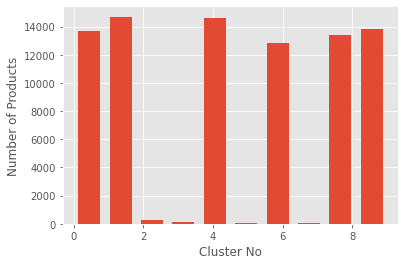

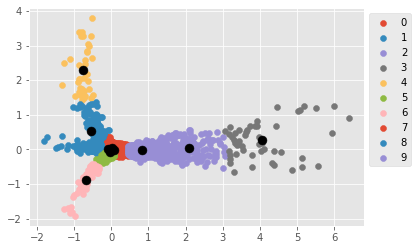

<Figure size 432x288 with 0 Axes>

In [93]:
model = fit_kmeans()


In [57]:
def save_final_product_clusters():
  import numpy as np  
  array_product_vectors = np.array(product_ids_and_vectors["Vectors"].values.tolist())

  assigned_cluster_no = model.fit_predict(array_product_vectors).tolist()

  product_ids_and_vectors["Cluster_No"] = assigned_cluster_no
  cluster_members_df = product_ids_and_vectors[["Product_ID","Cluster_No"]].groupby("Cluster_No")['Product_ID'].apply(list).to_frame().reset_index().rename(columns={'Product_ID': 'Cluster_Member_List'})

  return cluster_members_df

In [94]:
cluster_members_df = save_final_product_clusters()
cluster_members_df.head(10)

,Cluster_No,Cluster_Member_List
0,0,"[652695598, 242438430, 222487230, 48592580, 72..."
1,1,"[511382944, 380040945, 62932867, 652976667, 60..."
2,2,"[337326665, a652976204, 375324813, a49450342, ..."
3,3,"[337340793, 505646701, 760144855, 764951912, 7..."
4,4,"[60486308, 107003654, 95486912, 36367570, 8547..."
5,5,"[752126531, a521829648, 521829326, a575060958,..."
6,6,"[699866893, 598552791, 687352899, 620517387, 5..."
7,7,"[491730857, 699079214, 103709707, 652681942, 5..."
8,8,"[292821487, 113666925, 376670910, 14581972, 31..."
9,9,"[671240035, 791752085, 662375153, 441312256, 1..."


In [95]:
import numpy as np
# Product ID to generate recommendations for - You could try different product IDs in the data such as A16, C17, P12 etc.
product_id = "63594"

# Get Vector (Embedding) array of the given product
vector_array = np.array(product_ids_and_vectors[product_ids_and_vectors["Product_ID"]==product_id]["Vectors"].tolist())

# Get cluster number for the given product assigned by the model
cluster_no = model.predict(vector_array)[0]


# Get members list of the cluster that the given product is assigned to 
cluster_members_list = cluster_members_df[cluster_members_df['Cluster_No']==cluster_no]['Cluster_Member_List'].iloc[0]

# Randomly select 5 product recommendations from the cluster members excluding the given product
from random import sample
#cluster_members_list.remove(product_id)
five_product_recommendations = sample(cluster_members_list, 15)

print("15 Similar Product Recommendations for {}: ".format(product_id),five_product_recommendations)
#print("15 Similar Product Recommendations for {}: ".format(product_id),cluster_members_list.model)

15 Similar Product Recommendations for 63594:  ['475963030', '327882229', '507828191', '33664794', '442308065', '238599310', '112823176', '78969235', '647320449', '103847007', '434520790', '212213049', '10825210', '135499325', '67216']


## Similar Score

In [97]:
#hide
import pandas as pd
import numpy as np
import random
from tqdm import tqdm
from gensim.models import Word2Vec 
import matplotlib.pyplot as plt
%matplotlib inline

import warnings;
warnings.filterwarnings('ignore')

#### Data Preparation
Let’s convert the StockCode to string datatype:

In [98]:
df = pd.read_csv("products.csv")
df.head()

,Unnamed: 0,client,timestamp,product_id
0,208,85ab8f53-b934-49dd-8d54-479ed08499f6,2021-08-29 17:05:45.368000+00:00,63594
1,209,85ab8f53-b934-49dd-8d54-479ed08499f6,2021-08-29 17:07:02.711000+00:00,63290
2,210,85ab8f53-b934-49dd-8d54-479ed08499f6,2021-08-29 17:08:51.306000+00:00,64872
3,247,46989f50-87f9-4ece-9db3-cffaa3bf2278,2021-08-29 19:23:07.176000+00:00,63593
4,1665,dbbcd1c1-c0ca-4eed-b144-736fc40f6d24,2021-08-29 20:00:40.706000+00:00,56093


In [99]:
df['product_id']= df['product_id'].astype(str)

In [100]:
# Check out the number of unique customers in our dataset
clients = df["client"].unique().tolist()
len(clients)

27799

 There are 27799 customers in our dataset.
For each of these customers, we will extract their buying history. In other words, we can have 27799 sequences of purchases.

#####  Small part of the dataset for validation purposes. Therefore, I will use the data of 90% of the customers to create word2vec embeddings. Let’s split the data.

In [101]:
# shuffle customer ID's
random.shuffle(clients)

# extract 90% of customer ID's
client_train = [clients[i] for i in range(round(0.8*len(clients)))]

# split data into train and validation set
train_df = df[df['client'].isin(client_train)]
validation_df = df[~df['client'].isin(client_train)]

We will create sequences of purchases made by the customers in the dataset for both the train and validation set.

In [102]:
# list to capture purchase history of the customers
purchases_train = []

# populate the list with the product codes
for i in tqdm(client_train):
    temp = train_df[train_df["client"] == i]["product_id"].tolist()
    purchases_train.append(temp)

100%|██████████| 22239/22239 [13:50<00:00, 26.79it/s]


In [103]:
# list to capture purchase history of the customers
purchases_val = []

# populate the list with the product codes
for i in tqdm(validation_df['client'].unique()):
    temp = validation_df[validation_df["client"] == i]["product_id"].tolist()
    purchases_val.append(temp)

100%|██████████| 5560/5560 [01:06<00:00, 83.37it/s] 


### Build word2vec Embeddings for Products

In [106]:
# train word2vec model
model = Word2Vec(window = 10, sg = 1, hs = 0,
                 negative = 10, # for negative sampling
                 alpha=0.03, min_alpha=0.0007,
                 seed = 14)

model.build_vocab(purchases_train, progress_per=200)

model.train(purchases_train, total_examples = model.corpus_count, 
            epochs=10, report_delay=1)

2022-05-31 19:46:20,675 : INFO : Word2Vec lifecycle event {'params': 'Word2Vec<vocab=0, vector_size=100, alpha=0.03>', 'datetime': '2022-05-31T19:46:20.675566', 'gensim': '4.2.0', 'python': '3.9.7 (default, Sep 16 2021, 16:59:28) [MSC v.1916 64 bit (AMD64)]', 'platform': 'Windows-10-10.0.19044-SP0', 'event': 'created'}
2022-05-31 19:46:20,675 : INFO : collecting all words and their counts
2022-05-31 19:46:20,675 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2022-05-31 19:46:20,683 : INFO : PROGRESS: at sentence #200, processed 2325 words, keeping 1553 word types
2022-05-31 19:46:20,683 : INFO : PROGRESS: at sentence #400, processed 4659 words, keeping 2868 word types
2022-05-31 19:46:20,683 : INFO : PROGRESS: at sentence #600, processed 6957 words, keeping 4114 word types
2022-05-31 19:46:20,683 : INFO : PROGRESS: at sentence #800, processed 9339 words, keeping 5321 word types
2022-05-31 19:46:20,691 : INFO : PROGRESS: at sentence #1000, processed 11656 wor

(1650412, 2589070)

In [109]:
print(model)

Word2Vec<vocab=10067, vector_size=100, alpha=0.03>


Our model has a vocabulary of 11211 unique words and their vectors of size 100 each.
Next, we will extract the vectors of all the words in our vocabulary and store it in one place for easy access.

In [199]:
# extract all vectors
X = model.wv.get_vector


AttributeError: 'function' object has no attribute 'size'

In [115]:
# X = list(model.wv.index_to_key)


In [118]:
# print(len(X))

11211


In [123]:
# y= model.wv.vector_size


### Visualize word2vec Embeddings

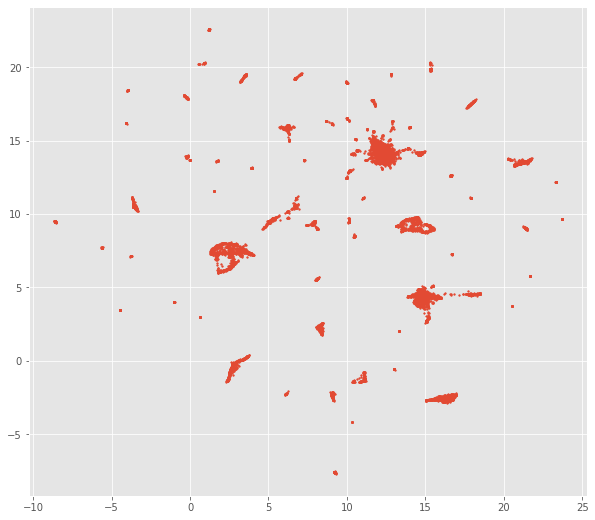

In [153]:
import umap

cluster_embedding = umap.UMAP(n_neighbors=30, min_dist=0.0,
                              n_components=2, random_state=42).fit_transform(X)

plt.figure(figsize=(10,9))
plt.scatter(cluster_embedding[:, 0], cluster_embedding[:, 1], s=3, cmap='Spectral')


### Start Recommending Products

In [185]:
print(new_model)

Word2Vec<vocab=10067, vector_size=100, alpha=0.03>


In [200]:
products = train_df[["product_id", "client"]]

# remove duplicates
products.drop_duplicates(inplace=True, subset='product_id', keep="last")

# create product-ID and product-description dictionary
products_dict = products.groupby('product_id')['client'].apply(list).to_dict()

In [201]:
products_dict['514260428']

['dd862c23-7265-4c74-892a-6d23d94beed1']

In [202]:
def similar_products(v, n = 6):
    
    # extract most similar products for the input vector
    ms = new_model.wv.most_similar(v, topn= n+1)[1:]

    
    # extract name and similarity score of the similar products
    new_ms = []
    for j in ms:
        pair = (products_dict[j[0]][0], j[1])
        new_ms.append(pair)
        
    return new_ms     

In [209]:
similar_products(['514260428'])

KeyError: "Key '514260428' not present in vocabulary"

In [207]:
similar_products(model['63593'])

TypeError: 'Word2Vec' object is not subscriptable

In [208]:
from gensim.models import Word2Vec
new_model.wv.similarity('514260428', '63593')

KeyError: "Key '514260428' not present"